### In this notebook we translate the risk sum to categories betwwen (1-5) and compare with risk cluster results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def Risk_Comp(df_RiskSum, df_RiskCluster):
    """
    In this method we translate the standardized risk sum values
    and join that with risk cluster colums
    ** For now it averages the risk sum over Vendor Code and Part Number
    for df_RiskSum and takes the max for RiskCluster 
    """
    
    # prepping the data
    
    df_RS = df_RiskSum.groupby(['Vendor Code','Part Number'])['RiskSum'].mean().reset_index()
    df_RC = df_RiskCluster.groupby(['Vendor Code','Part Number'])['risk'].max().reset_index()
    
    df_risk_merged = df_RS.merge(df_RC, on = ['Vendor Code','Part Number'])
    
    df_risk_merged.ix[(df_risk_merged['RiskSum']>=0) & (df_risk_merged['RiskSum']<0.2),'Risk Tag']=0  
    df_risk_merged.ix[(df_risk_merged['RiskSum']>=0.2) & (df_risk_merged['RiskSum']<0.4),'Risk Tag']=1
    df_risk_merged.ix[(df_risk_merged['RiskSum']>=0.4) & (df_risk_merged['RiskSum']<0.6),'Risk Tag']=2
    df_risk_merged.ix[(df_risk_merged['RiskSum']>=0.6) & (df_risk_merged['RiskSum']<0.8),'Risk Tag']=3
    df_risk_merged.ix[(df_risk_merged['RiskSum']>=0.8) & (df_risk_merged['RiskSum']<=1),'Risk Tag']=4
        
    
    return df_risk_merged
    
    

In [5]:
RSDATA = 'Harris Data/Expo_Purchasing_Risk_Sum.xlsx'
RCDATA = '../output/Risk_clusters.csv'
df_RiskSum = pd.read_excel(RSDATA)
df_RiskCluster = pd.read_csv(RCDATA)

   Vendor Code    Part Number   RiskSum  risk  Risk Tag
0           83  10511-2928-11  0.090569     4       0.0
1          612  12071-0100-01  0.089619     0       0.0
2          612  12071-0101-01  0.089528     0       0.0
3          612   P70-0002-001  0.089665     0       0.0
4          630  10400-0422-01  0.154456     4       0.0


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: 
.ix is deprecated

In [8]:
df_risk=Risk_Comp(df_RiskSum,df_RiskCluster)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: 
.ix is deprecated

In [45]:
def Cluster_plot(df,maingroup):
    """
    Given dataframe and maingroup: group of columns used
    for grouping and making pivot table
    """
    df= df[maingroup].groupby(['risk','Risk Tag']).count().reset_index()
    df=df.rename(columns={'Vendor Code':'count'})
    df.pivot("risk", "Risk Tag", "count").plot(kind='bar',figsize=(5,10))
    plt.ylabel('Risk Tag counts')
    plt.show()


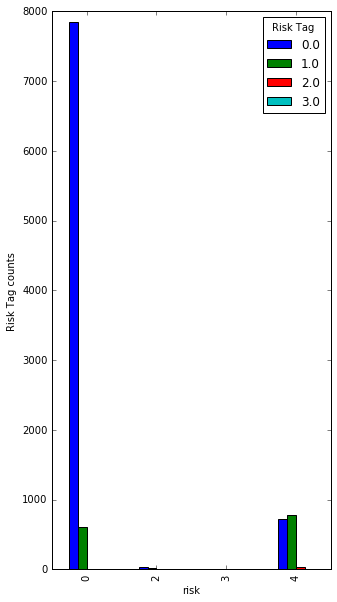

In [46]:
Cluster_plot(df_risk,['Risk Tag','risk','Vendor Code'])